# Travelling Salesman Problem with Reinforcement Learning

Candidate number: 52373, 43553
(We contribute equally to this project)

## Abstract

This project aims to address the Traveling Salesman Problem (TSP) by employing different reinforcement learning algorithms. It is found that the gym environment is not suitable for solving the TSP effectively. However, the Deep Q-learning Network (DQN), when implemented in a carefully designed environment, exhibits better performance in addressing TSP instances with 48 nodes, 101 nodes, 280 nodes, and 535 nodes. The primary objective of this investigation is to gain insights into the potential application of reinforcement learning algorithms in solving combinatorial optimization problems like the TSP. The findings serve as a foundation for future research and development in this domain, while also highlighting the limitations and challenges faced during the exploration.

## 1. Introduction

### 1.1 Travelling Salesman Problem

The Traveling Salesman Problem (TSP) is an NP-hard challenge in the realm of combinatorial optimization. It aims to find a cycle of minimum length that visits every nodes exactly once in a given graph. Many exact and heuristic methods have been developed to determine the optimal solution. Nonetheless, exact algorithms like enumeration or branch-and-bound techniques struggle to produce results when dealing with large-scale instances. While heuristic approaches, such as genetic algorithms, can generate solutions quickly, they cannot guarantee precision.

As a result, it is essential to create high-quality approximation algorithms to effectively solve the TSP. Reinforcement learning offers a promising approach to solve the TSP, by providing a framework for learning to make good decisions based on rewards and without requiring the optimal solution as a teacher.

### 1.2 Makrov Decision Process

Reinforcement learning for TSP typically involves representing the problem as a Markov Decision Process (MDP). MDPs characterise a fully observable environment for reinforcement learning. It can be defined as a tuple $<S, A, P, R, \gamma>$, where

$S$ is the state space. In the content of TSP, it can be defined as a set of partial solutions (i.e. the current tour).

$A$ is the action space. Actions in TSP involve selecting the next unvisited node based on the current state.

$P$ is the state transition probability matrix. It contains the probability of transitioning to $s_{t+1}$ in the next epoch, given the current state is $s_{t}$ and the current action is $a$.

$R$ is the reward function, which maps from the state and actions into real numbers. It indicates how an action in a specific state can improve the solution. Rewards in TSP can be defined as the negative tour length.

$\gamma$ is the scalar discount factor ranging between $0$ and $1$. This factor helps balance the immediate rewards and future rewards, encouraging the agent to prioritize short-term gains.


A policy $\pi$ in MDP is a probability distribution, mapping from states into actions,

$$\pi(a|s) = \mathbb{P}[A_t = a | S_t = s].$$

It helps the agent to decide which action to take in a given state, with the ultimate goal of maximsing the expected cumulative discounted rewards over time. The optimal policy $\pi^{*}$ is the one that leads to the highest possible long-term rewards for the agent while navigating the MDP.


### 1.3 Reinforcement Learning Algorithms

There are two main classes of algorithms used in MDPs to estimate the value or action-value function and find the optimal policy $\pi^{*}$: Value-based methods and Policy-based methods.

#### Value-Based Methods

Value-based methods aim to find the optimal policy by the approximation of a value function $V(s)$ and an action-value function $Q(s,a)$, selecting the action that maximises the value function in each state.

The value function $V(s)$ represents the expected cumulative discounted sum of rewards starting from state $s$ and following policy $\pi$ thereafter:

$$V^\pi(s) = E^\pi[∑_{i=0}^∞ \gamma^i R_{i+t}| S_t=s].$$

The action-state value function $Q(s,a)$ represents the expected cumulative discounted sum of rewards starting from state $s$, taking action $a$, and following policy $\pi$ thereafter:

$$Q^\pi(s,a) = E^\pi[∑_{i=0}^∞ \gamma^i R_{i+t}| S_t=s,A_t=a].$$

The Bellman Equation provides a recursive property to iteratively estimate the value function:

$$V^\pi(s) = E^\pi[R_t + \gamma V^\pi(S_{t+1})| S_t=s].$$

The relationship between $V^\pi(s)$ and $Q^\pi(s,a)$ is:

$$V^\pi(s) = ∑_{a} \pi(a|s) Q^\pi(s,a)$$
and
$$Q^\pi(s,a) = E[R_t + \gamma V^\pi(S_{t+1})|S_t=s,A_t=a)].$$

The Bellman optimality equation is a key equation used in value-based methods. It expresses the optimal value function $V^*(s)$ in terms of the optimal action-value function $Q^*(s,a)$:

$$V^*(s) = max_a Q^*(s,a)$$

where $max_a$ represents the maximum over all possible actions $a$ in state $s$.

The optimal action-value function $Q^*(s,a)$ is the maximum action-value function over all policies:

$$Q^*(s,a) = max_\pi Q^\pi(s,a).$$

Value-based methods typically involve estimating the optimal value function or optimal action-value function using methods such as Q-learning, SARSA, or deep Q-learning network (DQN) to find the optimal policy.

#### Policy-Based Methods

Policy-based methods aim to learn the optimal policy directly, without first learning the value function. These methods directly parameterise the policy, typically using a neural network or other function approximator, and update the parameters to maximise the expected cumulative discounted sum of rewards.

The policy gradient is a key equation used in policy-based methods. It expresses the gradient of the expected cumulative discounted sum of rewards with respect to the policy parameters:

$$∇_\theta J(\pi_\theta) = E[∑_t \gamma^t ∇_\theta log \pi_\theta(a_t|s_t) Q^\pi(s_t,a_t)]$$

where $∇_\theta$ represents the gradient with respect to the policy parameters $\theta$, $J(\pi_\theta)$ represents the expected cumulative discounted sum of rewards under policy $\pi_\theta$, $\pi_\theta(a_t|s_t)$ represents the probability of taking action $a_t$ in state $s_t$ under the policy parameterised by $\theta$, and $Q^\pi(s_t,a_t)$ represents the action-value function under policy $\pi$.

Policy-based methods typically involve optimising the policy parameters using methods such as policy gradient, REINFORCE and Proximal Policy Optimisation (PPO).

There are also hybrid methods that combine value-based and policy-based approaches, such as advantge actor-critic (A2C), using a combination of value function and policy parametersation to learn an optimal policy.

In this project, we initially employ three different reinforcement learning algorithms to address the TSP. These include a value-based method (DQN), a policy-based method (PPO), and a hybrid method (A2C).

## 2. Methodology

This project aims to solve the TSP using examples from the `tsplib95` package. 

**Part 1**  In the first part of the project, we create a TSP environment using the `gym` library to represent the MDP of the TSP. We then employ the `stable-baselines3` library to implement Proximal Policy Optimization (PPO), Advantage Actor-Critic (A2C), and Deep Q-learning Network (DQN) algorithms to solve a 280-node TSP instance respectively.

**Part 2** However, all three models in our first attempt fail to avoid revisiting nodes. Consequently, we develop a separate DQN model without utilising the `stable-baselines3` library, and construct a new TSP environment by generating a distance matrix for all pairs of nodes without relying on the `gym` library. By training the DQN model in this new environment, we are able to discover a better solution for the TSP.

## 3.Implementation

### 3.1 Part 1

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from stable_baselines3 import PPO,A2C,DQN
from stable_baselines3.common.env_checker import check_env
import gym
from gym import spaces
import tsplib95
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

Load and define the problem from the `tsp` file. We start with the 280-node TSP instance. 

In [2]:

def load_problem(problem_file):
    problem = tsplib95.load(problem_file)
    n_nodes = problem.dimension
    nodes = list(problem.get_nodes())
    node_coords = {node: problem.node_coords[node] for node in nodes}
    return n_nodes, nodes, node_coords, problem


In [19]:
n_nodes, nodes, node_coords, problem=load_problem('tsp/a280.tsp')
n_nodes,node_coords

(280,
 {1: [288, 149],
  2: [288, 129],
  3: [270, 133],
  4: [256, 141],
  5: [256, 157],
  6: [246, 157],
  7: [236, 169],
  8: [228, 169],
  9: [228, 161],
  10: [220, 169],
  11: [212, 169],
  12: [204, 169],
  13: [196, 169],
  14: [188, 169],
  15: [196, 161],
  16: [188, 145],
  17: [172, 145],
  18: [164, 145],
  19: [156, 145],
  20: [148, 145],
  21: [140, 145],
  22: [148, 169],
  23: [164, 169],
  24: [172, 169],
  25: [156, 169],
  26: [140, 169],
  27: [132, 169],
  28: [124, 169],
  29: [116, 161],
  30: [104, 153],
  31: [104, 161],
  32: [104, 169],
  33: [90, 165],
  34: [80, 157],
  35: [64, 157],
  36: [64, 165],
  37: [56, 169],
  38: [56, 161],
  39: [56, 153],
  40: [56, 145],
  41: [56, 137],
  42: [56, 129],
  43: [56, 121],
  44: [40, 121],
  45: [40, 129],
  46: [40, 137],
  47: [40, 145],
  48: [40, 153],
  49: [40, 161],
  50: [40, 169],
  51: [32, 169],
  52: [32, 161],
  53: [32, 153],
  54: [32, 145],
  55: [32, 137],
  56: [32, 129],
  57: [32, 121],
  

Set up the TSP environment using `gym`.

In [3]:
import random

class TSPEnv(gym.Env):
    def __init__(self, problem_file):
        # Initialize the environment
        super(TSPEnv, self).__init__()
        # Load the TSP problem from a file
        self.n_nodes, self.nodes, self.node_coords, self.problem = load_problem(problem_file)
        # Print the number of nodes in the problem
        print(self.n_nodes)
        self.action_space = spaces.Discrete(self.n_nodes)
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.n_nodes, 2), dtype=np.float32)
        self.total_distance = 0

    def reset(self):
        # Reset the environment to a random starting state
        self.current_node = random.choice(self.nodes)
        self.visited_nodes = set([self.current_node])
        self.visited_order = [self.current_node]
        self.total_distance = 0
        obs=self._get_observation()
        # Return the initial observation
        return  obs

    def step(self, action):
        # Take an action and update the environment state accordingly
        reward = 0
        done = False
        next_node = self.nodes[action]
         # Check if all nodes have been visited

        if len(self.visited_nodes) == self.n_nodes - 1:
            done = True
             # If all nodes have been visited, add the distance to the starting node to the total distance and use it as a negative reward
            self.total_distance += self.problem.get_weight(self.current_node, self.nodes[0])
            reward -= self.total_distance / 1000  # Decrease the magnitude of the reward
        else:
            # If not all nodes have been visited, check if the next node has already been visited
            if next_node not in self.visited_nodes:
                self.visited_nodes.add(next_node)
                self.visited_order.append(next_node)
                self.total_distance += self.problem.get_weight(self.current_node, next_node)
                reward = -self.problem.get_weight(self.current_node, next_node) / 1000  # Decrease the magnitude of the reward
                self.current_node = next_node
            else:
                 # If the next node has already been visited, incur a penalty
                reward = -10  # Decrease the penalty for visiting an already-visited node
                
        # Return the new observation, the reward, whether or not the episode is finished, and an empty info dictionary
        return self._get_observation(), reward, done, {}

    def _get_observation(self):
        # Return the current observation based on the visited nodes and the remaining nodes
        remaining_nodes = list(set(self.nodes) - self.visited_nodes)
        obs = np.zeros((self.n_nodes, 2), dtype=np.float32)
        remaining_node_indices = [node - 1 for node in remaining_nodes]  # Subtract 1 from node indices
        # print(remaining_node_indices)
        obs[remaining_node_indices, :] = [self.problem.node_coords[node] for node in remaining_nodes]
        return obs

    def render(self):
        print(f"Visited nodes: {self.visited_order}")

    def close(self):
        pass



In [ ]:
env = TSPEnv(problem_file='tsp/a280.tsp')

# Create an instance of the PPO (Proximal Policy Optimization) model with the MlpPolicy (Multi-Layer Perceptron Policy) and the TSPEnv environment
model = PPO('MlpPolicy', env, verbose=1,batch_size=128)

n_episodes = 10
total_timesteps = 1000  
rewards = []  # store the total reward obtained in each episode

# Loop over the number of episodes
for i in range(n_episodes):
    obs = env.reset()
    done = False
    episode_reward = 0  # The total reward obtained in the current episode
    steps=0
    
    # Loop over the timesteps of the current episode
    while not done and steps<total_timesteps:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        episode_reward += reward  # Add the reward obtained in the current timestep to the total reward obtained in the current episode
        steps+=1
    rewards.append(episode_reward)  # Add the total reward obtained in the current episode to the list of rewards
    print(f"Episode {i}: reward = {episode_reward}, length = {len(env.visited_order)}")
    model.learn(total_timesteps=total_timesteps) # Update the model based on the experience gained in the current episode


env.close()

# plot
plt.plot(range(n_episodes), rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()


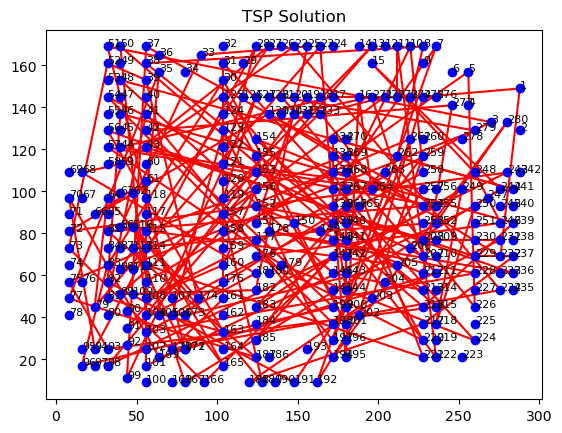

In [26]:
# Save the trained PPO model
model.save("ppo_tsp_model")

# Load the saved PPO model for inference
loaded_model = PPO.load("ppo_tsp_model")

# Define a function to visualize the TSP solution
def visualize_tsp_solution(nodes, visited_order, title="TSP Solution"):
    fig, ax = plt.subplots()
    
    # Scatter plot of nodes
    plt.scatter(nodes[:, 0], nodes[:, 1], c="blue", zorder=1)
    
     # Add node labels
    
    for i, node in enumerate(nodes):
        ax.annotate(i + 1, (node[0], node[1]), fontsize=8, zorder=2)
        
    # Plot lines between visited nodes in the order they were visited    
    visited_nodes = nodes[visited_order]
    
    for i in range(len(visited_nodes) - 1):
        plt.plot([visited_nodes[i][0], visited_nodes[i+1][0]], [visited_nodes[i][1], visited_nodes[i+1][1]], c="red", zorder=0)
    plt.plot([visited_nodes[-1][0], visited_nodes[0][0]], [visited_nodes[-1][1], visited_nodes[0][1]], c="red", zorder=0)
    
    # Add title and show plot
    plt.title(title)
    plt.show()

# Get the initial observation and start the TSP problem
obs = env.reset()
done = False
visited_order = [env.current_node - 1]

# Perform inference with the loaded model until the TSP problem is solved
while not done:
    action, _ = loaded_model.predict(obs)
    obs, reward, done, info = env.step(action)
    
    # Add the current node to the visited order if it has not been visited before
    if env.current_node not in visited_order:
        visited_order.append(env.current_node - 1)

# Visualize the TSP solution using the function defined above
nodes = np.array([env.problem.node_coords[node] for node in env.nodes])
visualize_tsp_solution(nodes, visited_order)

In [14]:
import os

def train_and_inference(env, model, n_episodes=10, total_timesteps=1000, save_path="results", save_img=True):
    # Create a directory to store results if it does not already exist
    os.makedirs(save_path, exist_ok=True)
    
    rewards = []  # Store the reward for each episode
    for i in range(n_episodes):
        obs = env.reset()
        done = False
        episode_reward = 0   # Initialize the total reward for the current episode

        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, info = env.step(action)
            episode_reward += reward  # Accumulate the reward for the current episode

        rewards.append(episode_reward) # Store the total reward for the current episode
        # Print the episode number, total reward, and length of the visited order
        print(f"Episode {i}: reward = {episode_reward}, length = {len(env.visited_order)}")
         # Train the model for the specified number of timesteps
        model.learn(total_timesteps=total_timesteps)

    env.close()

    # plot
    plt.plot(range(n_episodes), rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    if save_img:
        plt.savefig(os.path.join(save_path, "reward_plot.png"))
    plt.show()

    # Save the trained model
    model.save(os.path.join(save_path, "ppo_tsp_model"))

    # Load the saved model for inference
    loaded_model = PPO.load(os.path.join(save_path, "ppo_tsp_model"))

    # predict a solution using the loaded model
    obs = env.reset()
    done = False
    visited_order = [env.current_node - 1]

    while not done:
        action, _ = loaded_model.predict(obs)
        obs, reward, done, info = env.step(action)
        if env.current_node not in visited_order:
            visited_order.append(env.current_node - 1)

    # Visualize the solution
    nodes = np.array([env.problem.node_coords[node] for node in env.nodes])
    visualize_tsp_solution(nodes, visited_order, save_path=save_path, save_img=save_img)

def visualize_tsp_solution(nodes, visited_order, title="TSP Solution", save_path="results", save_img=True):
     # Create a scatter plot of the nodes and annotate each node with its index
    fig, ax = plt.subplots()
    plt.scatter(nodes[:, 0], nodes[:, 1], c="blue", zorder=1)
    
    for i, node in enumerate(nodes):
        ax.annotate(i + 1, (node[0], node[1]), fontsize=8, zorder=2)
        
    # Plot the edges in the visited order    
    visited_nodes = nodes[visited_order]
    for i in range(len(visited_nodes) - 1):
        plt.plot([visited_nodes[i][0], visited_nodes[i+1][0]], [visited_nodes[i][1], visited_nodes[i+1][1]], c="red", zorder=0)
    plt.plot([visited_nodes[-1][0], visited_nodes[0][0]], [visited_nodes[-1][1], visited_nodes[0][1]], c="red", zorder=0)
    
    plt.title(title)
    if save_img:
        plt.savefig(os.path.join(save_path, "tsp_solution.png"))
    plt.show()




Solve the 280-node TSP instance using PPO, A2C and DQN models in the gym environment respectively.

280
Training with PPO algorithm
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode 0: reward = -7333.114999999999, length = 271
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.3e+03   |
|    ep_rew_mean     | -1.03e+04 |
| time/              |           |
|    fps             | 553       |
|    iterations      | 1         |
|    time_elapsed    | 3         |
|    total_timesteps | 2048      |
----------------------------------
Episode 1: reward = -7324.414000000002, length = 272
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.58e+03 |
|    ep_rew_mean     | -1.3e+04 |
| time/              |          |
|    fps             | 543      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
Episode 2: reward = -7303.701999999999, length = 274
------------------------

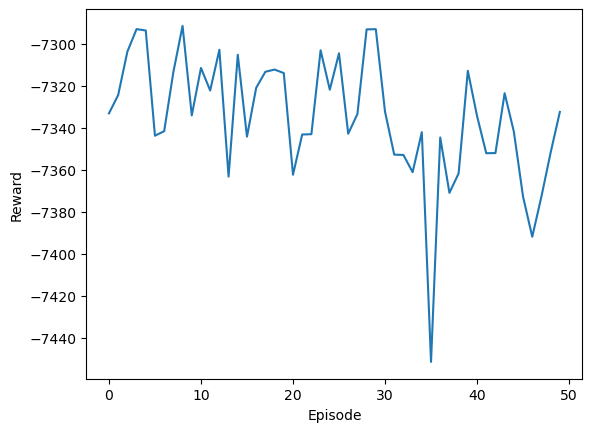

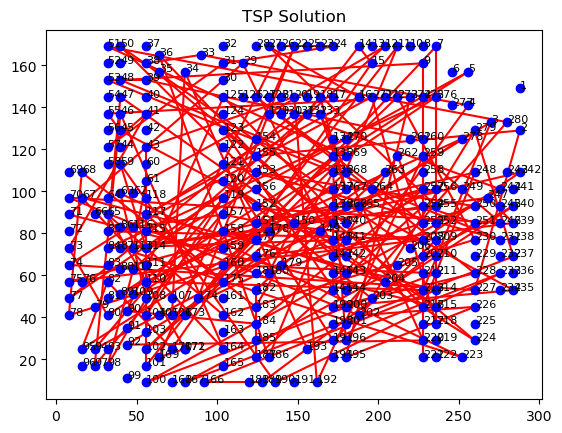

280
Training with A2C algorithm
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode 0: reward = -7332.803999999999, length = 271
------------------------------------
| time/                 |          |
|    fps                | 306      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -5.53    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -175     |
|    value_loss         | 1.04e+03 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 633       |
|    ep_rew_mean        | -3.61e+03 |
| time/                 |           |
|    fps                | 303       |
|    iterations         | 200       |
|    time_elapsed       | 3         

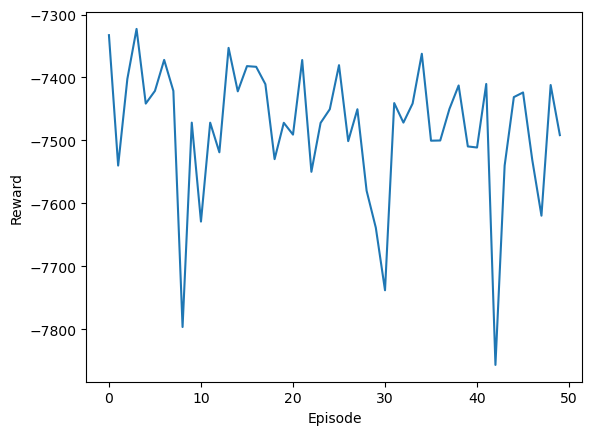

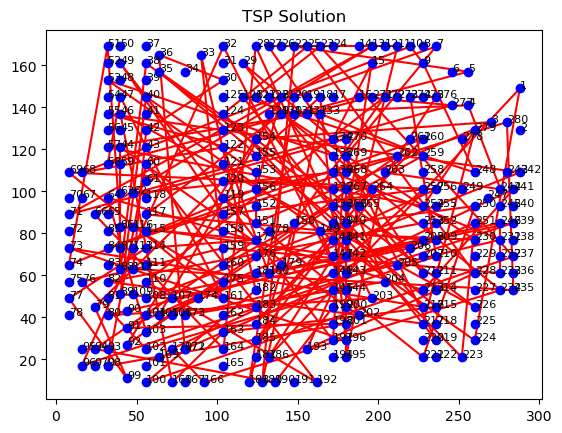

280
Training with DQN algorithm
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode 0: reward = -9990.043, length = 2
Episode 1: reward = -9446.695999999996, length = 57
Episode 2: reward = -9476.651000000003, length = 54
Episode 3: reward = -9466.174999999997, length = 55
Episode 4: reward = -9525.887, length = 49
Episode 5: reward = -9546.145, length = 47
Episode 6: reward = -9437.062999999995, length = 58
Episode 7: reward = -9535.907000000001, length = 48
Episode 8: reward = -9536.075999999997, length = 48
Episode 9: reward = -9436.385999999997, length = 58
Episode 10: reward = -9516.471, length = 50
Episode 11: reward = -9556.07, length = 46
Episode 12: reward = -9535.557999999995, length = 48
Episode 13: reward = -9535.532999999998, length = 48
Episode 14: reward = -9535.545999999997, length = 48
Episode 15: reward = -9584.610999999999, length = 43
Episode 16: reward = -9565.997, length = 45
Episode 17: reward = -9417.32199999999

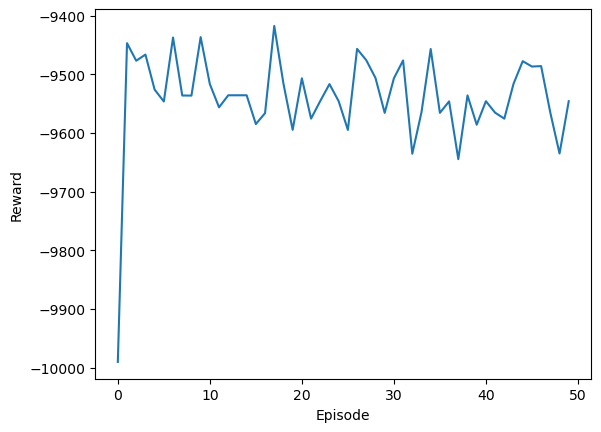

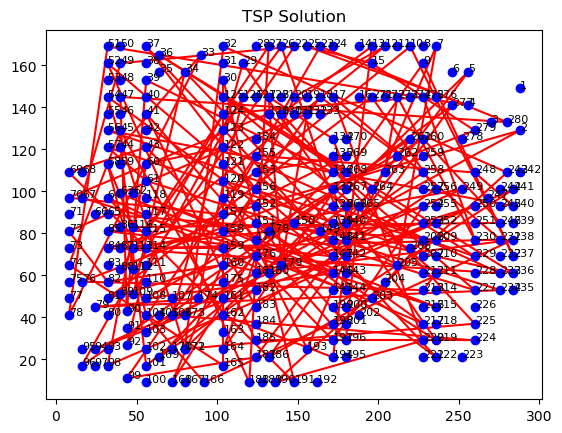

In [16]:
# Set the path to the TSP problem file
problem_file = 'tsp/a280.tsp'


n_episodes = 100
total_timesteps = 1000
save_img = True

# Define a list of RL algorithms to train
algorithms = ['PPO', 'A2C','DQN']

# Iterate over each algorithm and train an RL model
for algorithm in algorithms:
    env = TSPEnv(problem_file=problem_file)
    print(f"Training with {algorithm} algorithm")
    # Create an RL model depending on which algorithm is being trained
    if algorithm == 'PPO':
        model = PPO('MlpPolicy', env, verbose=1,batch_size=64)
    elif algorithm == 'DQN':
        model = DQN('MlpPolicy', env, verbose=1,batch_size=64)
    elif algorithm == 'A2C':
        model = A2C('MlpPolicy', env, verbose=1)
        
    # Set the save path for the trained model and results
    save_path = f"results/{algorithm}"
    
    # Train and evaluate the RL model on the TSP environment
    train_and_inference(env, model, n_episodes=n_episodes, total_timesteps=total_timesteps,
                        save_path=save_path, save_img=save_img)


Upon analysing the resulting graphs, it becomes evident that all three models exhibit poor performance on the 280-node TSP instance. This observation reinforces the notion that the `gym` environment is ill-suited for TSP, as it primarily designed for sequential decision-making tasks with well-defined states, actions, and rewards. In contrast, TSP is a combinatorial optimisation problem that aims to identify the optimal tour among a vast array of potential permutations.

Additionally, we discovered that `stable-baseline3` was unable to adjust the Q values to prevent revisiting previously visited points. To address this issue, we set the corresponding Q values to the smallest possible float number in our custom implementation, effectively avoiding the repetition of visited points. 

Consequently, we adopted an alternative approach in the second part of our study, where we construct a new environment to represent TSP as a matrix and develop a DQN model tailored to our requirements. In this representation, each matrix element corresponds to the distance between two nodes (cities).

### 3.2 Part 2

Set up the new TSP environment by generating a distance matix.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import tsplib95

class TSPEnv_new:
    def __init__(self, problem_file):
        # Initialize the TSP environment with a problem file
        self.problem_file = problem_file
        # Load the TSP problem using tsplib95 package
        self.n_cities, self.nodes, self.node_coords, self.problem = self._load_problem()
        # Create a dictionary that maps index to city name
        self.city_index_to_name = {i: name for i, name in enumerate(self.nodes)}
        # Set the action space and observation space
        self.action_space = self.n_cities
        self.observation_space = self.n_cities
        # Create an empty list to keep track of visited cities
        self.visited_cities = []
        # Calculate the distance matrix between cities
        self._generate_distances()

    def _load_problem(self):
        # Load the TSP problem using tsplib95 package and extract relevant information
        problem = tsplib95.load(self.problem_file)
        n_nodes = problem.dimension
        nodes = list(problem.get_nodes())
        node_coords = {node: problem.node_coords[node] for node in nodes}
        return n_nodes, nodes, node_coords, problem

    def _generate_distances(self):
        # Generate the distance matrix between all pairs of cities using the city coordinates
        coords = np.array(list(self.node_coords.values()))
        self.distances = cdist(coords, coords)

    def reset(self):
        # Reset the visited cities list and randomly select a starting city
        self.visited_cities = []
        first_city = np.random.randint(self.n_cities)
        self.visited_cities.append(first_city)
        return first_city

    def step(self, action):
        # Get the index of the current city
        current_city_index = self.visited_cities[-1]
        new_city_index = action
        # print(new_city_index)
        reward = -self.distances[current_city_index, new_city_index]

        self.visited_cities.append(new_city_index)
        done = len(self.visited_cities) == self.n_cities

        return new_city_index, reward, done

    def render(self):
        # Plot the TSP problem and the visited cities if any
        coords = np.array(list(self.node_coords.values()))
        plt.figure(figsize=(7, 7))
        plt.scatter(coords[:, 0], coords[:, 1], c="red", s=50)
        if len(self.visited_cities) > 1:
            plt.plot(coords[self.visited_cities, 0], coords[self.visited_cities, 1], c="blue", linewidth=1, linestyle="--")
        plt.xticks([])
        plt.yticks([])
        plt.show()

    def close(self):
        plt.close()


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def visualize_tsp_solution(nodes, visited_order, title="TSP Solution", save_path="results", save_img=True):
    # Create a new figure and axis object
    fig, ax = plt.subplots()
    # Plot all nodes as blue dots
    plt.scatter(nodes[:, 0], nodes[:, 1], c="blue", zorder=1)
    
    # Annotate each node with its index number
    for i, node in enumerate(nodes):
        ax.annotate(i + 1, (node[0], node[1]), fontsize=8, zorder=2)
        
    # Plot lines connecting visited nodes in red    
    visited_nodes = nodes[visited_order]
    
    for i in range(len(visited_nodes) - 1):
        plt.plot([visited_nodes[i][0], visited_nodes[i+1][0]], [visited_nodes[i][1], visited_nodes[i+1][1]], c="red", zorder=0)
    plt.plot([visited_nodes[-1][0], visited_nodes[0][0]], [visited_nodes[-1][1], visited_nodes[0][1]], c="red", zorder=0)
    
    # Add a title to the plot
    plt.title(title)
    # If save_img is True, save the plot to a file
    if save_img:
        plt.savefig(os.path.join(save_path, "tsp_solution.png"))
        
    # Show plot
    plt.show()

DQN is a value-based algorithm that combines Q-learning with deep neural networks. In traditional Q-Learning, the Q-function is typically stored in a table. However, for large state-action spaces, maintaining a Q-table becomes infeasible due to memory and computational constraints. DQN addresses this issue by approximating the Q-function using a deep neural network, known as the Q-network.

During training, the Q-network is updated using a loss function based on the Temporal Difference (TD) error, which measures the discrepancy between the current estimate of the Q-function and the improved estimate obtained by considering the observed reward and the maximum Q-value for the next state. The Q-network learns to minimise this error over time, leading to a more accurate approximation of the Q-function.

The loss function for DQN using Mean Squared Error (MSE) can be defined as follows:

$$Loss(\theta) = \mathbb{E}_{(s, a, r, s', d) \sim U(D)}\Big[\big(r + \gamma \max_{a'} Q(s', a'; \theta^{-}) - Q(s, a; \theta)\big)^2\Big],$$

where

$\theta$ represents the parameters of the Q-network.

$\theta^{-}$ represents the parameters of the target Q-network.

$(s, a, r, s', d)$ are the state, action, reward, next state, and done flag sampled from the replay buffer $D$ using a uniform sampling $U(D)$.

Three different models were used here to test the impact of different model complexities on the results:
These three models are:

1. QNetwork: It consists of only three fully connected layers and is used to implement simple function fitting. The input is a vector of dimension input_dim, and the output is a vector of dimension output_dim.

2. ComplexQNetwork: It consists of five fully connected layers and one dropout layer, and is used to implement more complex function fitting. The input is a vector of dimension input_dim, and the output is a vector of dimension output_dim.

3. ComplexCNNNetwork: It is a five-layer convolutional neural network used to process time-series data. The input is a vector of length input_dim, and the output is a vector of dimension output_dim.

In [38]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random

# Define the QNetwork class which is a simple fully-connected neural network
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=64):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the ComplexQNetwork class which is a more complex fully-connected neural network
class ComplexQNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ComplexQNetwork, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, output_dim)
        
        self.dropout = nn.Dropout(p=0.1)
        
    # Forward pass of the neural network    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        
        return x
    
class ComplexCNNNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ComplexCNNNetwork, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv1d(128, 64, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv1d(64, 1, kernel_size=3, stride=1, padding=1)
        
        self.fc = nn.Linear(input_dim, output_dim)  # input_dim should be the same as the initial input_dim
        
        self.dropout = nn.Dropout(p=0.1)
        
    # Forward pass of the neural network    
    def forward(self, x):
        x = x.unsqueeze(1)  # Add an extra dimension for the channels
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        x = F.relu(self.conv4(x))
        x = self.dropout(x)
        x = F.relu(self.conv5(x))
        x = self.dropout(x)

        # Flatten the output from the conv layers
        x = x.view(x.size(0), -1)

        # Pass the output through a fully connected layer to get the final output
        x = self.fc(x)
        
        return x



# Define the ReplayBuffer class which will store the agent's experiences
class ReplayBuffer:
    def __init__(self, buffer_size):
        self.buffer = deque(maxlen=buffer_size)

    def add(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)
    
# Define the DQNAgent class which will hold the agent's Q-network and target network, as well as the agent's experiences
class DQNAgent:
    def __init__(self, input_dim,env, output_dim, q_network_class, hidden_dim=64, buffer_size=10000,
                 batch_size=128, gamma=0.99, learning_rate=1e-4,
                 epsilon_start=1.0, epsilon_end=0.01, epsilon_decay=0.995, device="cuda"):
        
        # Initialize the agent's variables
        self.env = env
        self.q_network = q_network_class(input_dim, output_dim).to(device)
        self.target_network = q_network_class(input_dim, output_dim).to(device)
        self.target_network.load_state_dict(self.q_network.state_dict())
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=learning_rate)
        self.buffer = ReplayBuffer(buffer_size)
        self.batch_size = batch_size
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.visited_nodes = set()
        self.device = device
        
    # Reset the agent's set of visited nodes
    def reset_visited_nodes(self):
        self.visited_nodes = set()

    def predict(self, current_city, deterministic=False):
        # Get the coordinates of the current city
        current_city_coords = self.env.node_coords[current_city]
        
        # Compute the relative coordinates of all cities to the current city
        relative_coords = {city: (coords[0] - current_city_coords[0], coords[1] - current_city_coords[1]) 
                        for city, coords in self.env.node_coords.items()}
        # Flatten the relative coordinates and convert it to a tensor
        observation = np.array(list(relative_coords.values())).flatten()
        observation = torch.tensor(observation, dtype=torch.float32).unsqueeze(0).to(self.device)

        # print(observation.shape) 
        q_values = self.q_network(observation).detach().cpu().numpy().flatten()

        # Mask already visited nodes with -np.inf
        for visited_node_index in self.visited_nodes:
            q_values[visited_node_index] = -np.inf

        # Choose the action
        if deterministic or np.random.rand() > self.epsilon:
            action = np.argmax(q_values)
        else:
            action = np.random.choice([x for x in range(len(q_values)) if x not in self.visited_nodes])

        return action


    def update(self, state, action, reward, next_state, done):
        # Convert the states into the same form as in the 'predict' method
        current_city_coords = self.env.node_coords[state]
        relative_coords = {city: (coords[0] - current_city_coords[0], coords[1] - current_city_coords[1]) 
                        for city, coords in self.env.node_coords.items()}
        state = np.array(list(relative_coords.values())).flatten()

        next_city_name = self.env.city_index_to_name[next_state]
        next_city_coords = self.env.node_coords[self.env.city_index_to_name[next_state]]
        next_relative_coords = {city: (coords[0] - next_city_coords[0], coords[1] - next_city_coords[1]) 
                                for city, coords in self.env.node_coords.items()}
        next_state = np.array(list(next_relative_coords.values())).flatten()

        self.buffer.add((state, action, reward, next_state, done))

        if len(self.buffer) >= self.batch_size:
            experiences = self.buffer.sample(self.batch_size)

            # Extract the values from the experiences
            states, actions, rewards, next_states, dones = zip(*experiences)

            states = torch.tensor(states, dtype=torch.float32).to(self.device)
            actions = torch.tensor(actions, dtype=torch.long).unsqueeze(-1).to(self.device)
            rewards = torch.tensor(rewards, dtype=torch.float32).unsqueeze(-1).to(self.device)
            next_states = torch.tensor(next_states, dtype=torch.float32).to(self.device)
            dones = torch.tensor(dones, dtype=torch.bool).unsqueeze(-1).to(self.device)

            q_values = self.q_network(states).gather(1, actions)
            next_q_values = self.target_network(next_states).max(1, keepdim=True)[0].detach()
            target_q_values = rewards + (self.gamma * next_q_values * ~dones)

            loss = nn.MSELoss()(q_values, target_q_values)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Update epsilon
            self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)


    def update_target_network(self):
        self.target_network.load_state_dict(self.q_network.state_dict())

    def save(self, filepath):
        torch.save(self.q_network.state_dict(), filepath)

    def load(self, filepath):
        self.q_network.load_state_dict(torch.load(filepath))
    

## Model visualization

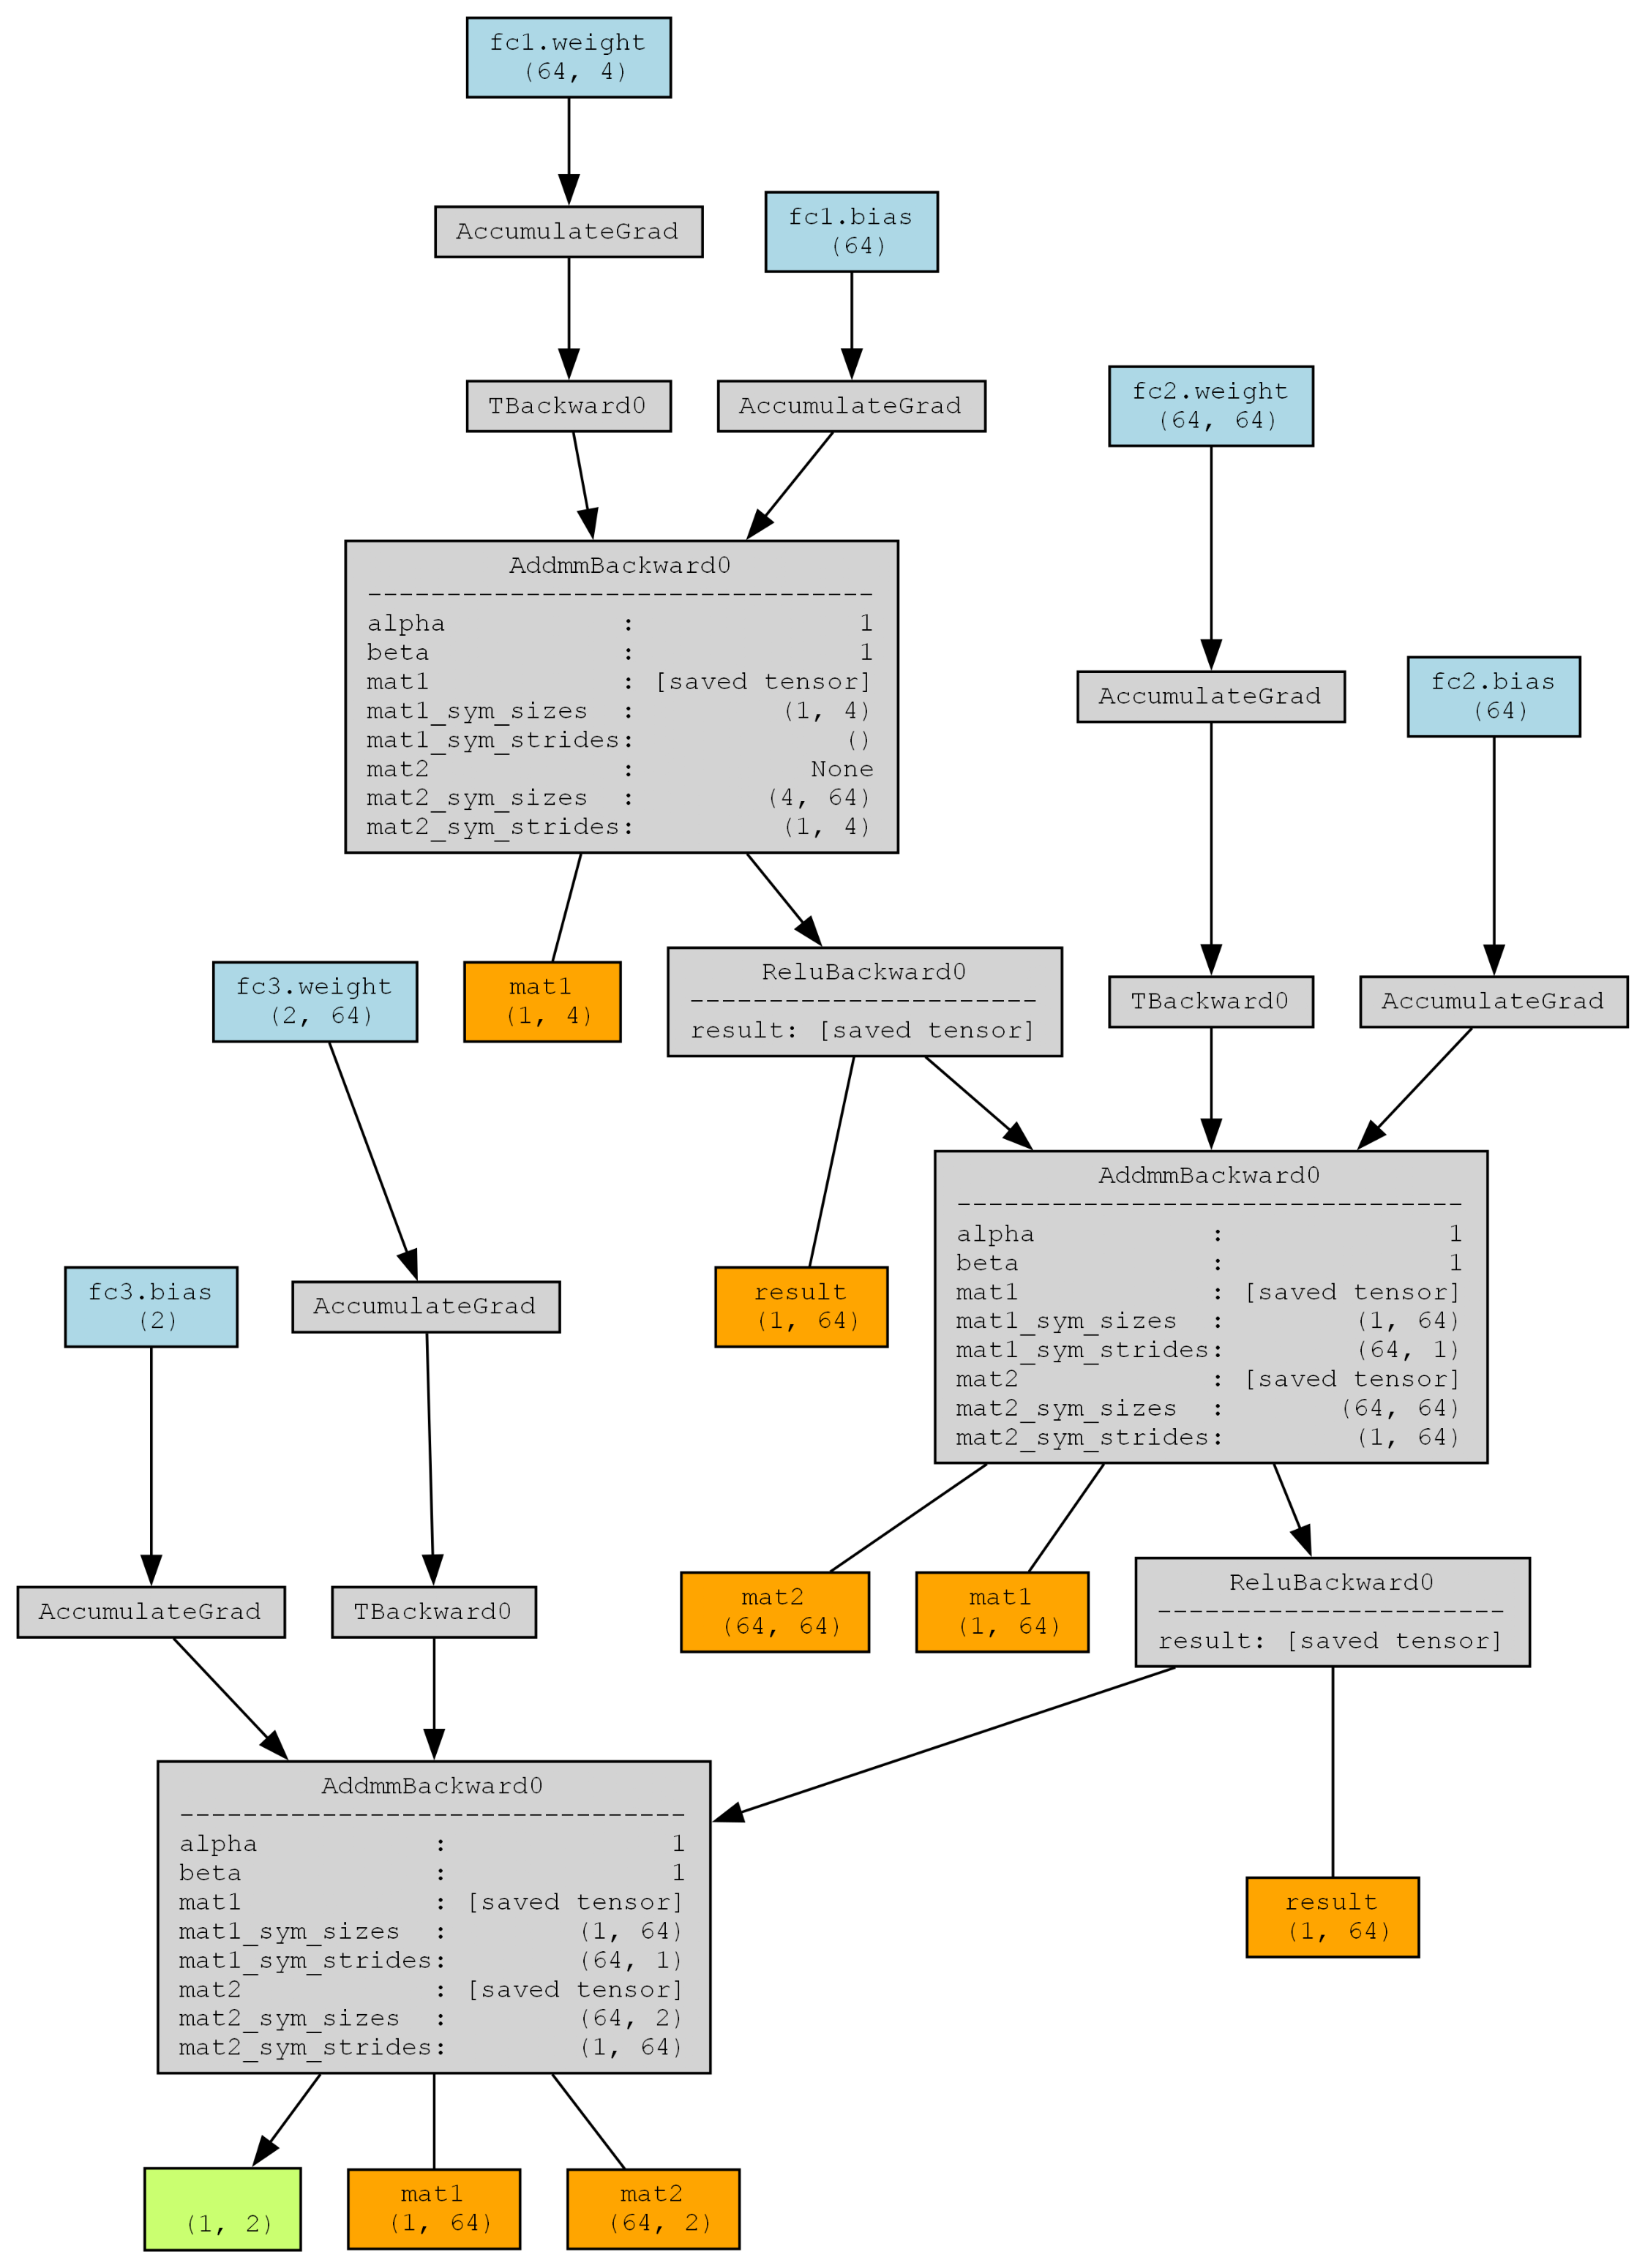

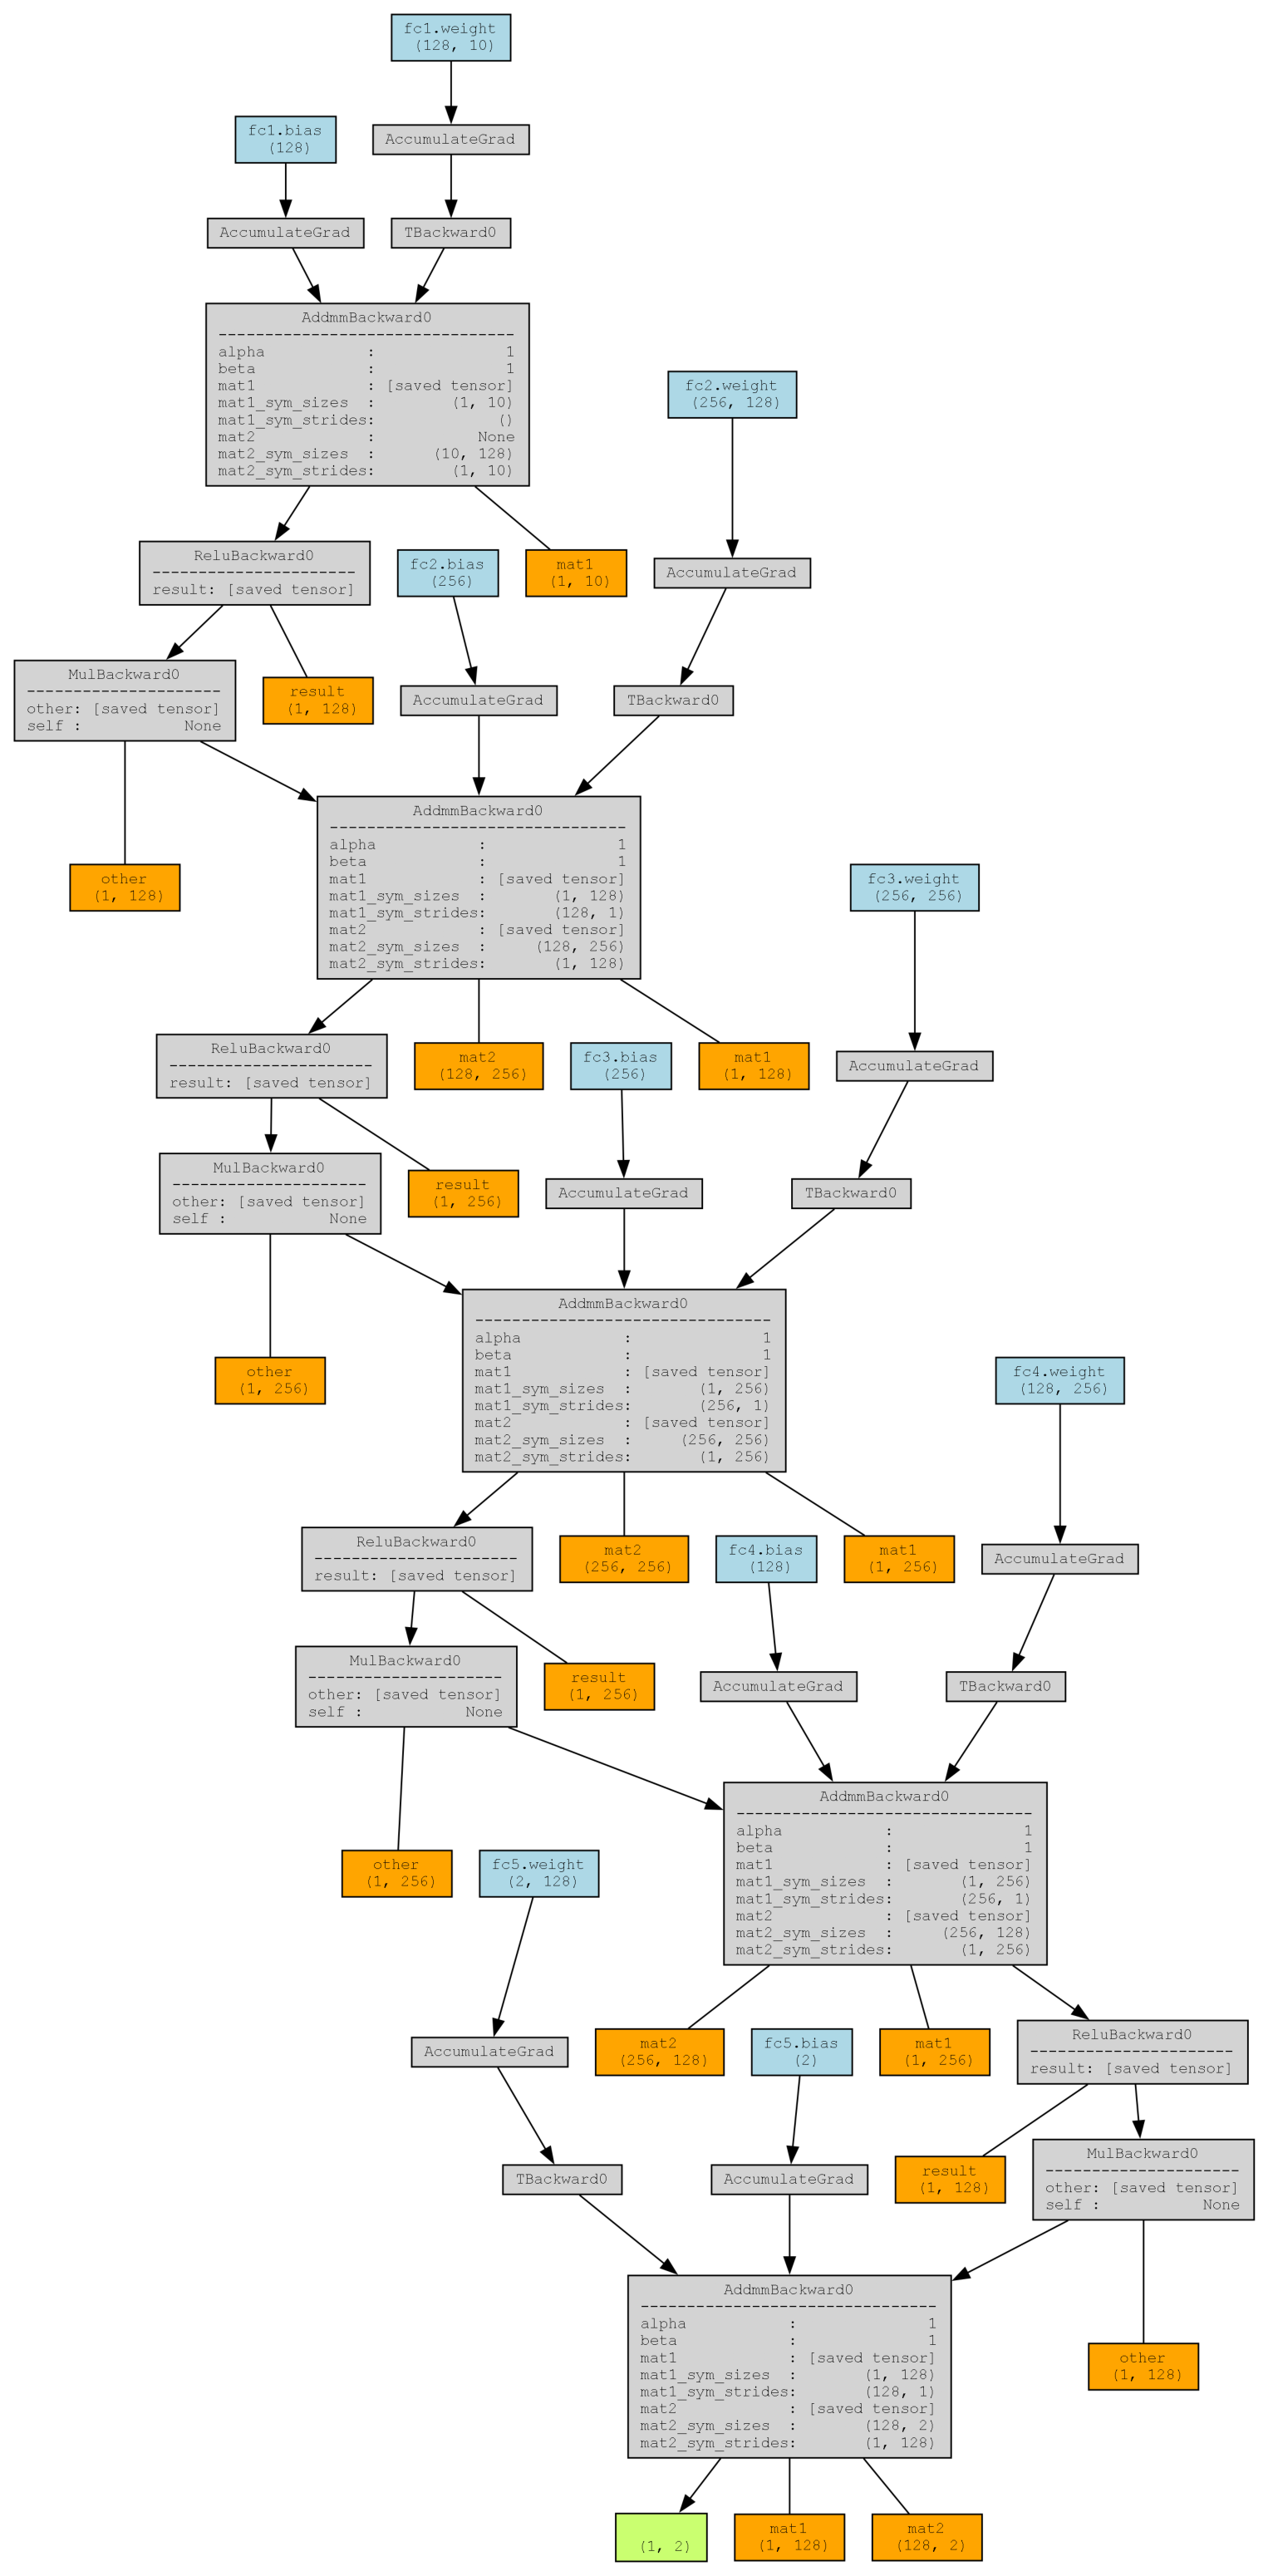

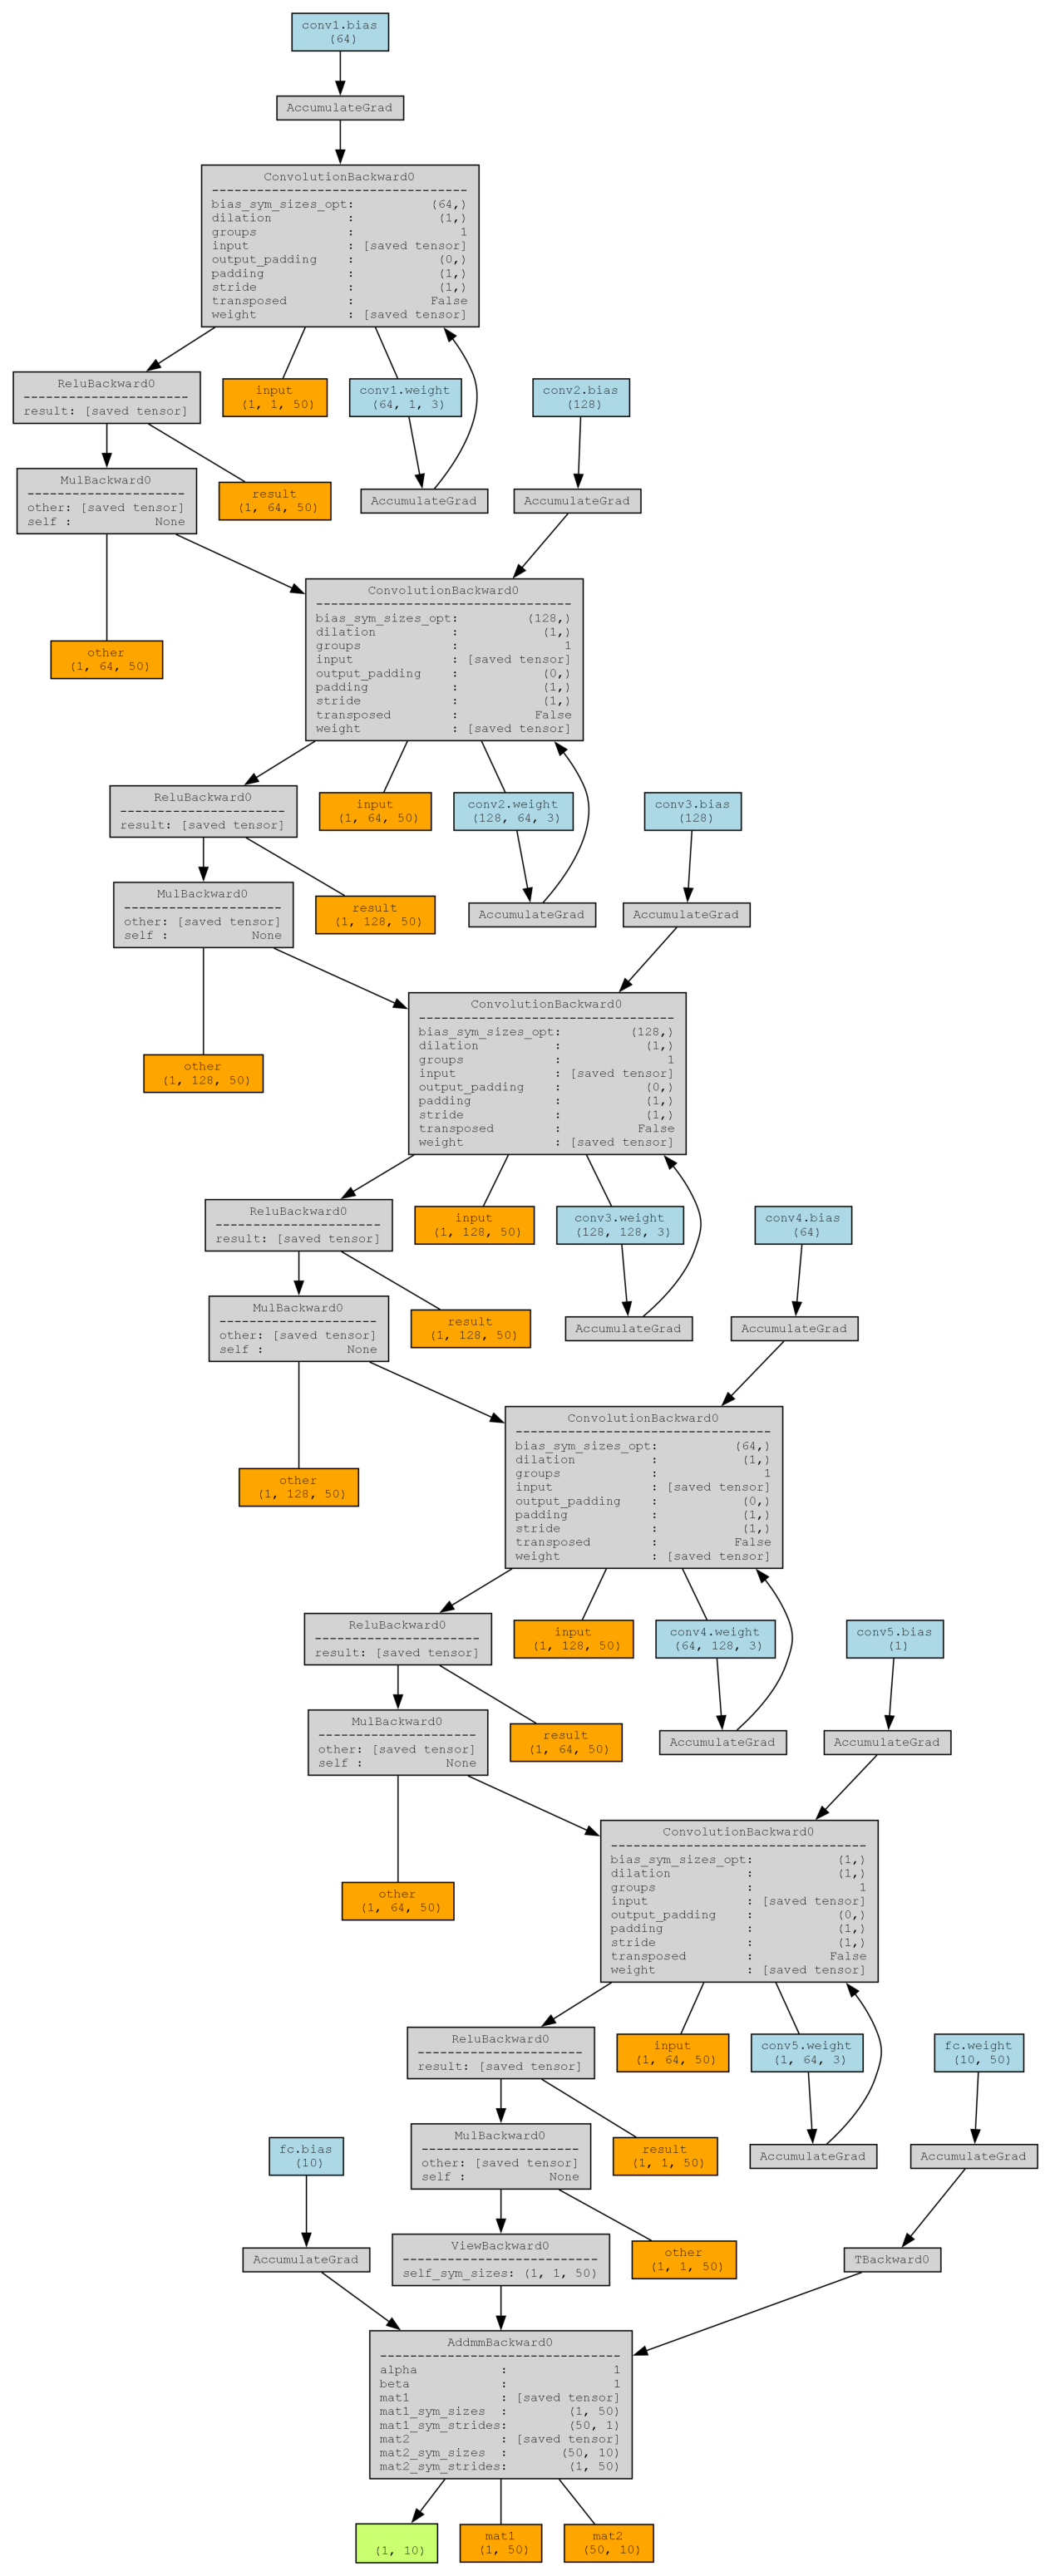

In [109]:
import torch
import torch.nn.functional as F
from matplotlib.image import imread
from torchviz import make_dot

# Define the models
models = [QNetwork(input_dim=4, output_dim=2),
          ComplexQNetwork(input_dim=10, output_dim=2),
          ComplexCNNNetwork(input_dim=50, output_dim=10)]

# Create dummy input tensors
input_tensors = [torch.randn(1, 4),
                 torch.randn(1, 10),
                 torch.randn(1, 50)]

# Visualize the models
for i, model in enumerate(models):
    output_tensor = model(input_tensors[i])
    dot=make_dot(output_tensor, params=dict(model.named_parameters()), 
             show_attrs=True, show_saved=True 
             )
    dot.attr(dpi=str(300))
    dot.render(f"model{i+1}", format="png")

    # Load and display the PNG image
    img = imread(f"model{i+1}.png")
    plt.figure(figsize=(50,40))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [36]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import random
import matplotlib.pyplot as plt


def train_dqn(env, agent, n_episodes=100, update_target_every=10, save_path="results",save_img=True):
    os.makedirs(save_path, exist_ok=True)

    rewards = []  # Store the rewards of each episode
    for episode in range(n_episodes):
        agent.reset_visited_nodes() # Reset the visited nodes for the current episode
        state = env.reset() # Reset the environment and get the initial state
        done = False
        episode_reward = 0
        actions=[]
        while not done:
            state+=1 # Add 1 to the state to convert it into an one-hot encoded tensor
            action = agent.predict(state) # Get the action to take based on the current state
            
            next_state, reward, done = env.step(action) # Perform the action in the environment and get the next state, reward, and done flag
            agent.update(state, action, reward, next_state, done) # Update the Q-network based on the current experience
            agent.visited_nodes.add(action) # Add the visited node to the set of visited nodes for the current episode
            state = next_state  # Update the current state
            episode_reward += reward  # Add the reward to the total reward of the current episode

        if episode % update_target_every == 0:
            agent.update_target_network()

        rewards.append(episode_reward)  # Store the total reward of the current episode
        print(f"Episode {episode}: reward = {episode_reward}, length = {len(agent.visited_nodes)}")

    # Plot the reward vs episode graph
    plt.plot(range(n_episodes), rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    if save_img:
        plt.savefig(os.path.join(save_path, "reward_plot.png"))
    plt.show()

    # Save the trained DQN agent
    agent.save(os.path.join(save_path, "dqn_tsp_model.pt"))






In [39]:
def inference_dqn(env, agent, save_path="results", save_img=True):
    #Load the model for inference
    loaded_agent =agent
    loaded_agent.load(os.path.join(save_path, "dqn_tsp_model.pt"))
    
    state = env.reset()
    done = False
    visited_order = []
    print(state)

    agent.reset_visited_nodes()
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        state+=1
        action = agent.predict(state)
        
        next_state, reward, done = env.step(action)
        agent.update(state, action, reward, next_state, done)
        agent.visited_nodes.add(action)
        visited_order.append(action)
        state = next_state
        episode_reward += reward

    #Visualization Solution
    nodes = np.array([env.problem.node_coords[node] for node in env.nodes])
    visualize_tsp_solution(nodes, visited_order, save_path=save_path, save_img=save_img)

## Simple

Episode 0: reward = -34169.1231410378, length = 279
Episode 1: reward = -32700.72797650064, length = 279
Episode 2: reward = -24607.86036458355, length = 279
Episode 3: reward = -20247.49705372839, length = 279
Episode 4: reward = -17647.196139790925, length = 279
Episode 5: reward = -15305.961226514508, length = 279
Episode 6: reward = -13942.170833346501, length = 279
Episode 7: reward = -12270.129861868534, length = 279
Episode 8: reward = -11582.395833103139, length = 279
Episode 9: reward = -10416.809285434567, length = 279
Episode 10: reward = -9588.974225954435, length = 279
Episode 11: reward = -10142.11115428284, length = 279
Episode 12: reward = -8946.621638889754, length = 279
Episode 13: reward = -8313.994080568664, length = 279
Episode 14: reward = -8070.077983776418, length = 279
Episode 15: reward = -7579.742316822925, length = 279
Episode 16: reward = -7506.544563956886, length = 279
Episode 17: reward = -7139.288545458131, length = 279
Episode 18: reward = -7027.594960

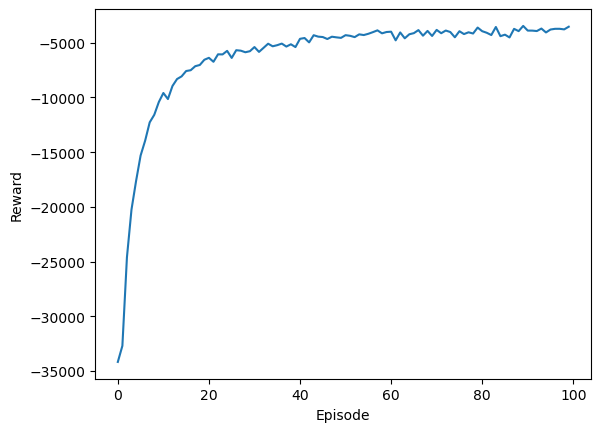

In [44]:
# Create TSP environment
tsp_env = TSPEnv_new("tsp/a280.tsp")

# Create DQN agent
agent = DQNAgent(input_dim=2 * tsp_env.n_cities, env=tsp_env,output_dim=tsp_env.n_cities, q_network_class=QNetwork)
train_dqn(tsp_env, agent, n_episodes=100, save_path="simple_results", save_img=True)


71


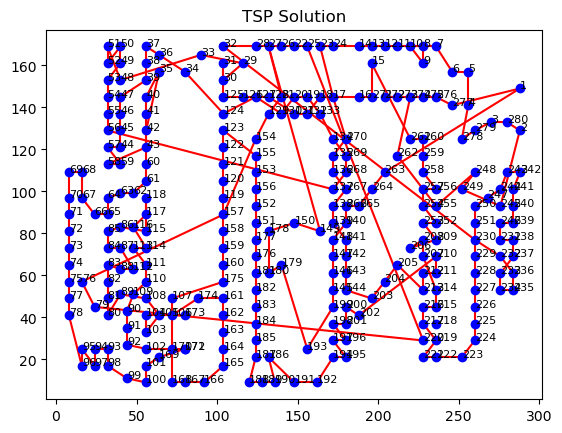

In [59]:

test_env = TSPEnv_new("tsp/a280.tsp")


loaded_agent=DQNAgent(input_dim=2 * test_env.n_cities,env=test_env,output_dim=test_env.n_cities, q_network_class=QNetwork)
inference_dqn(test_env, agent, save_path="simple_results", save_img=True)

## Complex

Episode 0: reward = -31862.340227304798, length = 279
Episode 1: reward = -31316.92966522615, length = 279
Episode 2: reward = -23827.84778630095, length = 279
Episode 3: reward = -18569.898763364265, length = 279
Episode 4: reward = -16097.672701485471, length = 279
Episode 5: reward = -14726.144301196087, length = 279
Episode 6: reward = -13583.001882753102, length = 279
Episode 7: reward = -12818.511211530675, length = 279
Episode 8: reward = -10863.289876044555, length = 279
Episode 9: reward = -10233.280718191618, length = 279
Episode 10: reward = -9930.299837523646, length = 279
Episode 11: reward = -9215.342085006308, length = 279
Episode 12: reward = -8706.452512597789, length = 279
Episode 13: reward = -8375.585289070465, length = 279
Episode 14: reward = -8246.447253637278, length = 279
Episode 15: reward = -7815.177095853359, length = 279
Episode 16: reward = -7561.481868301868, length = 279
Episode 17: reward = -7477.597259149892, length = 279
Episode 18: reward = -7836.682

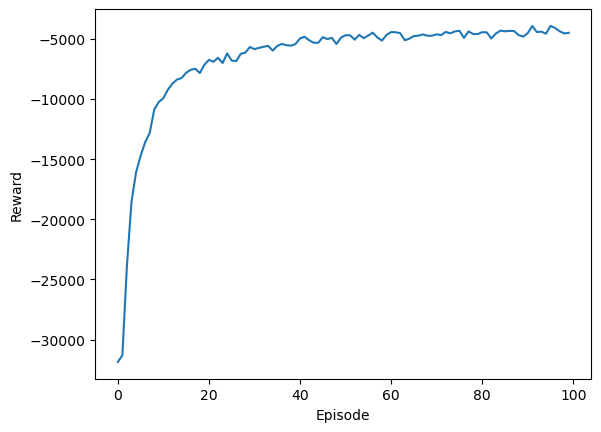

In [60]:
# Create TSP environment
tsp_env = TSPEnv_new("tsp/a280.tsp")

# Create DQN agent
agent = DQNAgent(input_dim=2 * tsp_env.n_cities, env=tsp_env,output_dim=tsp_env.n_cities, q_network_class=ComplexQNetwork)
train_dqn(tsp_env, agent, n_episodes=100, save_path="complex_results", save_img=True)


133


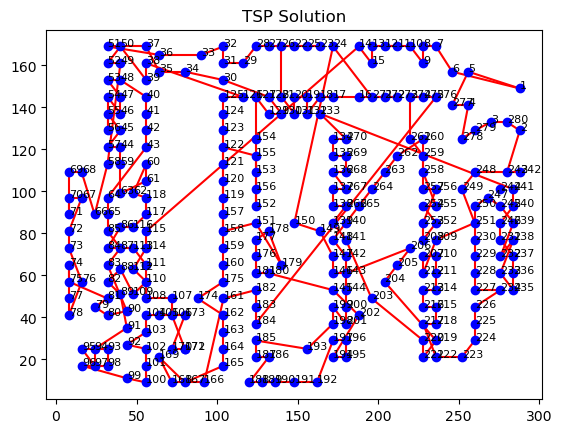

In [61]:

test_env = TSPEnv_new("tsp/a280.tsp")


loaded_agent=DQNAgent(input_dim=2 * test_env.n_cities,env=test_env,output_dim=test_env.n_cities, q_network_class=ComplexQNetwork)
inference_dqn(test_env, agent, save_path="complex_results", save_img=True)

## CNN

Episode 0: reward = -32381.58360007671, length = 279
Episode 1: reward = -33927.063498229196, length = 279
Episode 2: reward = -24176.220664003522, length = 279
Episode 3: reward = -19077.725069084638, length = 279
Episode 4: reward = -15790.652104110553, length = 279
Episode 5: reward = -13842.636094555593, length = 279
Episode 6: reward = -12252.387873080634, length = 279
Episode 7: reward = -10425.429578987676, length = 279
Episode 8: reward = -10288.235223848906, length = 279
Episode 9: reward = -9354.707516734647, length = 279
Episode 10: reward = -8358.914691427204, length = 279
Episode 11: reward = -8068.324984809961, length = 279
Episode 12: reward = -8243.084210940293, length = 279
Episode 13: reward = -7053.814333947855, length = 279
Episode 14: reward = -7002.410878665711, length = 279
Episode 15: reward = -6994.252963384414, length = 279
Episode 16: reward = -7287.818248225468, length = 279
Episode 17: reward = -6338.951606271212, length = 279
Episode 18: reward = -6635.409

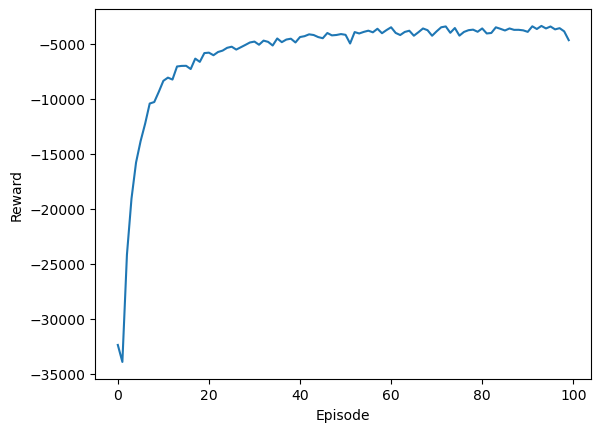

In [79]:
# Create TSP environment
tsp_env = TSPEnv_new("tsp/a280.tsp")

# Create DQN agent
agent = DQNAgent(input_dim=2 * tsp_env.n_cities, env=tsp_env,output_dim=tsp_env.n_cities, q_network_class=ComplexCNNNetwork)
train_dqn(tsp_env, agent, n_episodes=100, save_path="cnn_results", save_img=True)


261


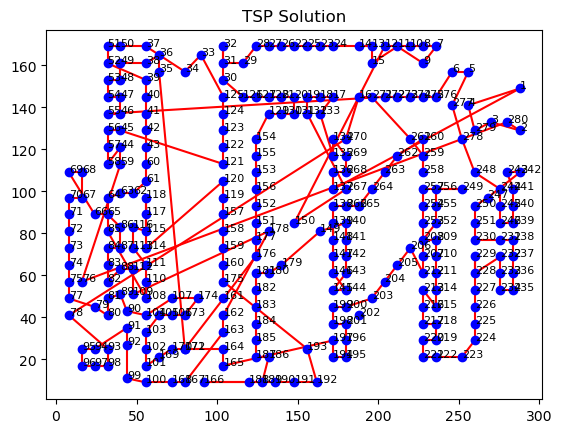

In [81]:

test_env = TSPEnv_new("tsp/a280.tsp")


loaded_agent=DQNAgent(input_dim=2 * test_env.n_cities,env=test_env,output_dim=test_env.n_cities, q_network_class=ComplexCNNNetwork)
inference_dqn(test_env, agent, save_path="cnn_results", save_img=True)

## Model Result:
It can be observed that although the complexity of the three models varies greatly, the rewards of the models all converge to around -4000 in the end. This basically indicates that the complexity of the models does not have a significant impact on the final results here. Therefore, for the subsequent TSP problem, it is preferred to choose the QNetwork model that has both fast training and inference speed.

Solve the 280-node TSP instance using the DQN model in the new environment.

81


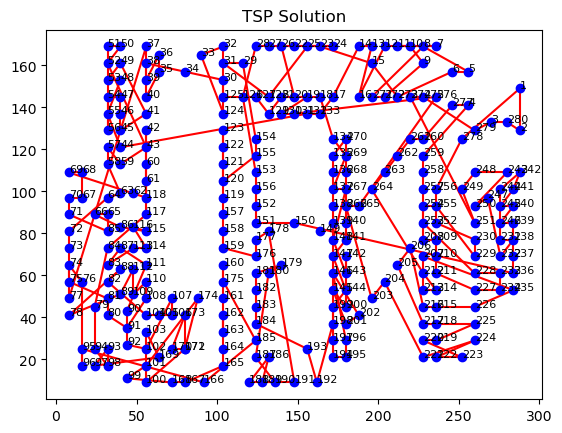

In [14]:

test_env = TSPEnv_new("tsp/a280.tsp")


loaded_agent=DQNAgent(input_dim=2 * test_env.n_cities,env=test_env,output_dim=test_env.n_cities, q_network_class=QNetwork)
inference_dqn(test_env, agent, save_path="simplt_results", save_img=True)

Solve the 535-node TSP instance using the DQN model in the new environment.

Episode 0: reward = -39308.76779165883, length = 534
Episode 1: reward = -37785.24648141569, length = 534
Episode 2: reward = -33706.162576550734, length = 534
Episode 3: reward = -29254.79166357236, length = 534
Episode 4: reward = -24627.980729633568, length = 534
Episode 5: reward = -22929.87962017087, length = 534
Episode 6: reward = -20759.14056443161, length = 534
Episode 7: reward = -18451.657036014578, length = 534
Episode 8: reward = -15972.930281557108, length = 534
Episode 9: reward = -15466.002111729995, length = 534
Episode 10: reward = -14457.486661254885, length = 534
Episode 11: reward = -13725.4900742176, length = 534
Episode 12: reward = -12866.651841020734, length = 534
Episode 13: reward = -12258.769082256422, length = 534
Episode 14: reward = -11315.30274667479, length = 534
Episode 15: reward = -10366.63744467, length = 534
Episode 16: reward = -10145.394132084095, length = 534
Episode 17: reward = -9375.335796470485, length = 534
Episode 18: reward = -9350.702211

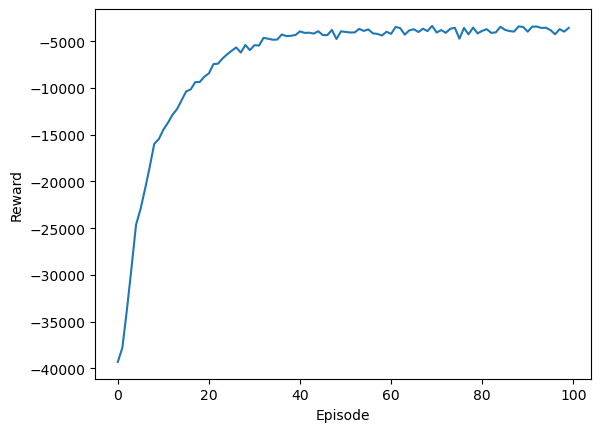

218


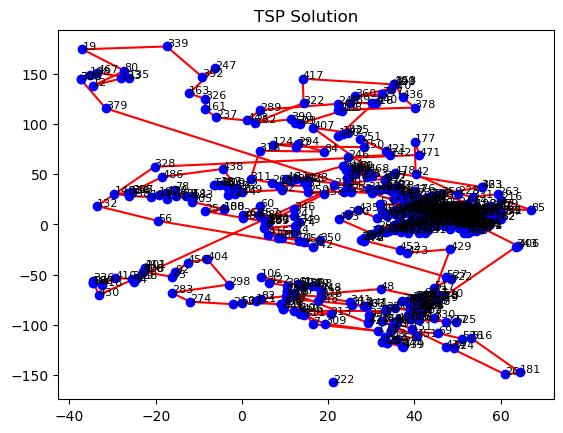

In [64]:
# Create TSP environment
file='ali535.tsp'
tsp_env = TSPEnv_new("tsp/"+file)

# Create DQN agent
agent = DQNAgent(input_dim=2 * tsp_env.n_cities, env=tsp_env,output_dim=tsp_env.n_cities, q_network_class=QNetwork)
train_dqn(tsp_env, agent, n_episodes=100, save_path="results/"+file, save_img=True)
inference_dqn(tsp_env, agent, save_path="results/"+file, save_img=True)

Solve the 48-node TSP instance using the DQN model in the new environment.

Episode 0: reward = -141112.37812640815, length = 47
Episode 1: reward = -144189.57667129824, length = 47
Episode 2: reward = -172967.49081552622, length = 47
Episode 3: reward = -163792.85689226893, length = 47
Episode 4: reward = -140406.877926282, length = 47
Episode 5: reward = -142376.30835686377, length = 47
Episode 6: reward = -118374.52890681091, length = 47
Episode 7: reward = -107256.32084004967, length = 47
Episode 8: reward = -118328.17328616137, length = 47
Episode 9: reward = -93418.56817754461, length = 47
Episode 10: reward = -85771.87864243366, length = 47
Episode 11: reward = -82989.70011008855, length = 47
Episode 12: reward = -73888.615510045, length = 47
Episode 13: reward = -76115.6081145951, length = 47
Episode 14: reward = -66786.58048127932, length = 47
Episode 15: reward = -58541.81601779903, length = 47
Episode 16: reward = -65611.7802613175, length = 47
Episode 17: reward = -53090.73639242826, length = 47
Episode 18: reward = -51463.96858944155, length = 47


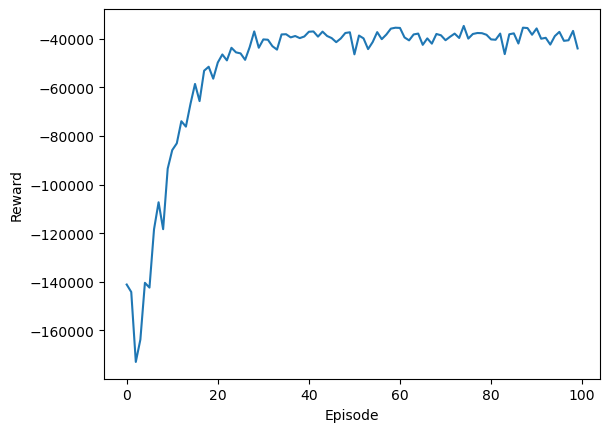

31


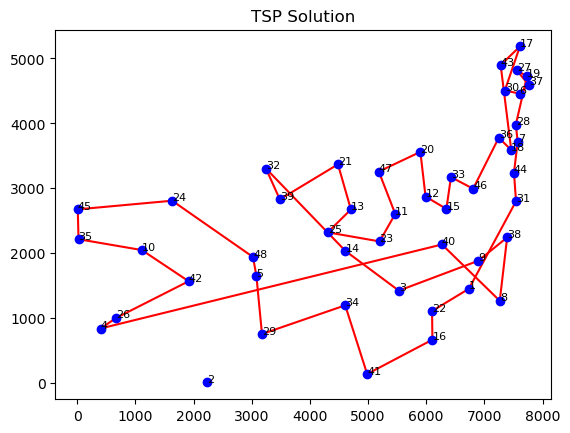

In [65]:
# Create TSP environment
file='att48.tsp'
tsp_env = TSPEnv_new("tsp/"+file)

# Create DQN agent
agent = DQNAgent(input_dim=2 * tsp_env.n_cities, env=tsp_env,output_dim=tsp_env.n_cities, q_network_class=QNetwork)
train_dqn(tsp_env, agent, n_episodes=100, save_path="results/"+file, save_img=True)
inference_dqn(tsp_env, agent, save_path="results/"+file, save_img=True)

Solve the 101-node TSP instance using the DQN model in the new environment.

Episode 0: reward = -3586.4744502581034, length = 100
Episode 1: reward = -3499.949854251027, length = 100
Episode 2: reward = -3479.1215031849524, length = 100
Episode 3: reward = -2883.471455231012, length = 100
Episode 4: reward = -2281.976126875733, length = 100
Episode 5: reward = -2124.983512500078, length = 100
Episode 6: reward = -1851.982977438369, length = 100
Episode 7: reward = -1678.2508658348775, length = 100
Episode 8: reward = -1481.3773006760348, length = 100
Episode 9: reward = -1422.4327422844517, length = 100
Episode 10: reward = -1437.9453467967203, length = 100
Episode 11: reward = -1246.101997562782, length = 100
Episode 12: reward = -1286.9154777372296, length = 100
Episode 13: reward = -1261.3561534152968, length = 100
Episode 14: reward = -1090.0703761683947, length = 100
Episode 15: reward = -1097.9417906976985, length = 100
Episode 16: reward = -1144.1993955194707, length = 100
Episode 17: reward = -1127.3345334697767, length = 100
Episode 18: reward = -1059

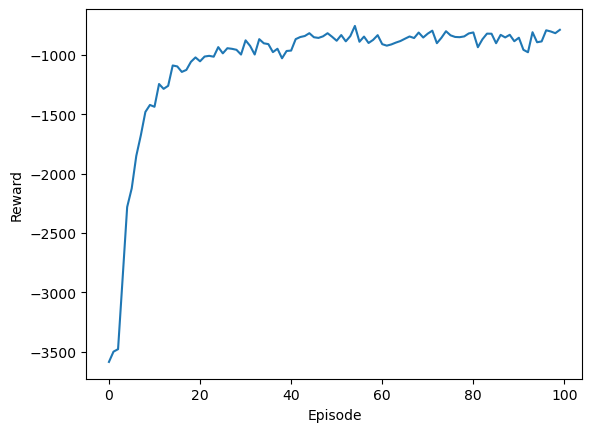

20


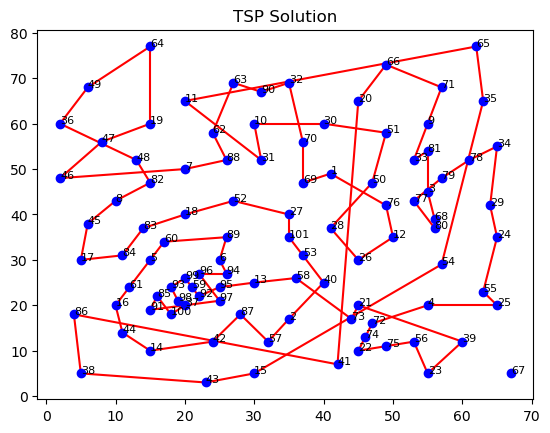

In [66]:
# Create TSP environment
file='eil101.tsp'
tsp_env = TSPEnv_new("tsp/"+file)

# Create DQN agent
agent = DQNAgent(input_dim=2 * tsp_env.n_cities, env=tsp_env,output_dim=tsp_env.n_cities, q_network_class=QNetwork)
train_dqn(tsp_env, agent, n_episodes=100, save_path="results/"+file, save_img=True)
inference_dqn(tsp_env, agent, save_path="results/"+file, save_img=True)

From the planning of these TSP problems using the models, it can be observed that the simpler the TSP problem, the more perfect the path planned by the model. When the complexity is high (280 nodes and 535 nodes), the differences in the loss planned by the model begin to become less obvious. Perhaps for TSP problems with high complexity, reinforcement learning has better robustness.

## 4. Discussion

### 4.1 Result
After developing the new environment and the custom DQN model, we observed a notable improvement in the results compared to the first part of our study. In the 280-node TSP instance, the best outcome from the first part (PPO model) had a tour length of approximately 7,300, whereas the second part managed to reduce the length to around 4,000. However, it is important to note that the optimal solution for the 280-node TSP instance is 2,579.

For the 48-node and 101-node instances, the generated solutions contained unvisited nodes, resulting in higher costs. These observations underscore the potential for further enhancements in the project. By refining the model and exploring additional techniques, it may be possible to achieve solutions closer to the optimal ones and address the issue of unvisited nodes, thus reducing costs and improving overall performance.

### 4.2 Alternative approach
The use of an encoder in the TSP can lead to significant improvements in learning efficiency and generalisation, as the problem's graph structure lends itself well to being mapped into a more meaningful representation by the encoder. In the context of the TSP, an RNN can be employed to encode a tour up to the current node, while also considering the output of the RNN at the previous node in the tour. This approach enables the encoder to learn and extract relevant features, patterns, and relationships from the input data, ultimately enhancing the reinforcement learning process. As a result, the algorithm can better understand and navigate the complex combinatorial space of the TSP problem.

## 5. Conclusion

In conclusion, this project addressed the Traveling Salesman Problem (TSP) using various reinforcement learning algorithms, with a primary focus on the Deep Q-learning Network (DQN). Although we observed an improvement in the results after creating a well-established environment and a DQN model compared to the initial approach, the results obtained were not as optimal as desired. It is essential to recognise that the main objective of this project was exploration, and therefore, expectations for the results should be moderated. Although the final results were not as impressive as those from traditional methods, they were acceptable considering the project's exploratory nature.

There are several limitations in this project, such as employing a relatively simple network and relying solely on one reinforcement learning strategy (DQN) without extensive tuning. However, the key takeaway is that, unlike traditional algorithms, DQN is not rigid and exhibits greater robustness. This characteristic allows DQN to tolerate incomplete data to a certain extent, which could prove advantageous in specific scenarios.

In summary, this project serves as a foundation for further investigation into reinforcement learning's potential in addressing combinatorial optimisation problems like the TSP. It highlights areas for improvement and future research, motivating the pursuit of more effective and accessible methodologies in this domain.

## Reference

Bello, I., Pham, H., Le, Q.V., Norouzi, M., Bengio, S., 2017. Neural Combinatorial Optimization with Reinforcement Learning. https://doi.org/10.48550/arXiv.1611.09940

Cappart, Q., Moisan, T., Rousseau, L.-M., Prémont-Schwarz, I., Cire, A., 2020. Combining Reinforcement Learning and Constraint Programming for Combinatorial Optimization. https://doi.org/10.48550/arXiv.2006.01610

Dai, H., Khalil, E.B., Zhang, Y., Dilkina, B., Song, L., 2018. Learning Combinatorial Optimization Algorithms over Graphs. https://doi.org/10.48550/arXiv.1704.01665

Hubbs, C.D., Perez, H.D., Sarwar, O., Sahinidis, N.V., Grossmann, I.E., Wassick, J.M., 2020. OR-Gym: A Reinforcement Learning Library for Operations Research Problems. https://doi.org/10.48550/arXiv.2008.06319

Liu, Z., Li, X., Khojandi, A., 2022. The flying sidekick traveling salesman problem with stochastic travel time: A reinforcement learning approach. Transportation Research Part E: Logistics and Transportation Review 164, 102816. https://doi.org/10.1016/j.tre.2022.102816

Mazyavkina, N., Sviridov, S., Ivanov, S., Burnaev, E., 2020. Reinforcement Learning for Combinatorial Optimization: A Survey.

Miki, S., Yamamoto, D., Ebara, H., 2018. Applying Deep Learning and Reinforcement Learning to Traveling Salesman Problem, in: 2018 International Conference on Computing, Electronics & Communications Engineering (ICCECE). Presented at the 2018 International Conference on Computing, Electronics & Communications Engineering (iCCECE), pp. 65–70. https://doi.org/10.1109/iCCECOME.2018.8659266
